<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Ciencia y analítica de datos
### Regresiones y K means
## Profesor: PhD. María de la Paz Rico Fernández
## Profesor Tutor: Roberto Antonio Guevara González
### Bernardo Mijangos Flores
### Matricula A01793654

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

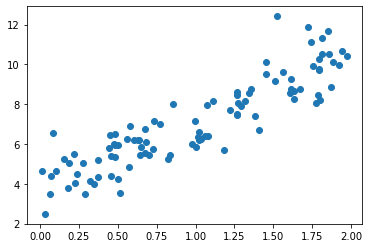

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

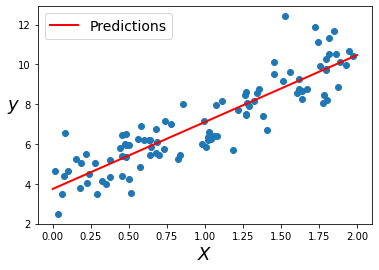

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

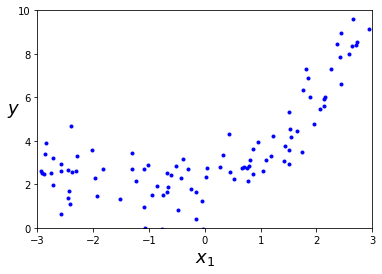

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

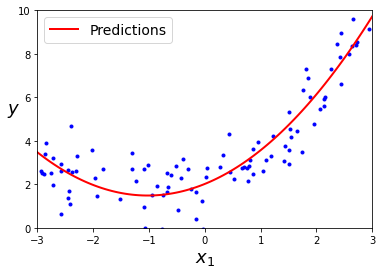

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

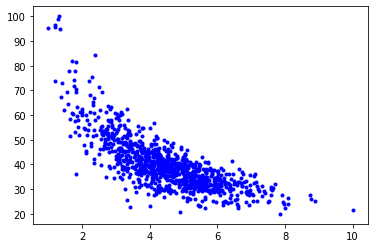

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
# dividimos los datos con 80% para entrenamiento y 20 para testing

xtrain, xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.2, random_state=10)

print(len(xtrain), len(xtest))

800 200


### Regresion Lineal

In [ ]:
#lineal
# Generamos el modelo

lr = LinearRegression(fit_intercept=True)
lr.fit(xtrain, ytrain)
lr

LinearRegression()

In [ ]:
# ecuacion del conjunto de entrenamiento

lr.coef_, lr.intercept_

(array([-5.917708]), 66.6344123257405)

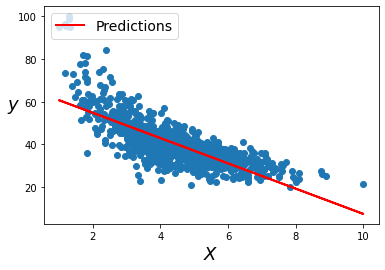

In [ ]:
# visualizacion del modelo

ypred = lr.predict(xtrain)

plt.scatter(X, y)
plt.plot(xtrain, ypred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
# Sus errores y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypred)))
print('r2_score',r2_score(ytrain, ypred))

Error medio Absoluto (MAE): 4.820604017193222
Root Mean Squared Error: 6.77040782877293
r2_score 0.5807583474715297


In [ ]:
#polinomial
# Realizamos el modelo de regresion polinomial

polyfeatures = PolynomialFeatures(degree=3, include_bias=False)
xpoly = polyfeatures.fit_transform(xtrain)

lrp = LinearRegression(fit_intercept=True)
lrp.fit(xpoly, ytrain)

LinearRegression()

In [ ]:
# ecuacion del conjunto de entrenamiento

lrp.coef_, lrp.intercept_


(array([-30.91430666,   4.43137134,  -0.22794994]), 107.82293595768634)

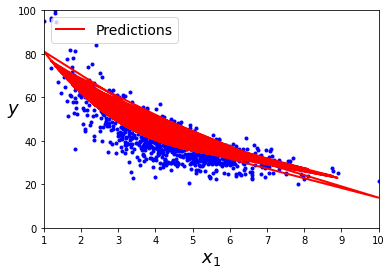

In [ ]:
# visualizacion del modelo

ypredpoly = lrp.predict(xpoly)

plt.plot(X, y, "b.")
plt.plot(xtrain, ypredpoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypredpoly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypredpoly)))
print('r2_score',r2_score(ytrain, ypredpoly))

Error medio Absoluto (MAE): 4.40312566965715
Root Mean Squared Error: 5.918554806867385
r2_score 0.6796194730974969


## Realiza la regresión con Ridge y Lasso

In [ ]:
# Generamos el modelo Ridge

modridge = Ridge(alpha=0.5)
mr=modridge.fit(xtrain,ytrain)
mr

Ridge(alpha=0.5)

In [ ]:
# Ecuacion del conjunto de datos

mr.coef_, mr.intercept_

(array([-5.91566894]), 66.62530567722436)

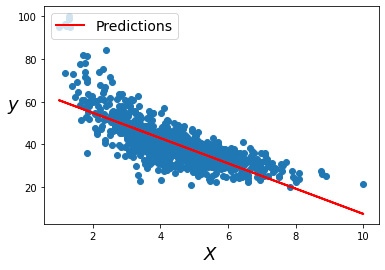

In [ ]:
# visualizacion del modelo

ypredrd = mr.predict(xtrain)

plt.scatter(X, y)
plt.plot(xtrain, ypredrd, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypredrd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypredrd)))
print('r2_score',r2_score(ytrain, ypredrd))

Error medio Absoluto (MAE): 4.820389318903653
Root Mean Squared Error: 6.770408385534538
r2_score 0.5807582785192088


In [ ]:
# Generamos el modelo Lasso

modlasso = Lasso(alpha=0.5)
ml=modlasso.fit(xtrain,ytrain)
ml

Lasso(alpha=0.5)

In [ ]:
# Ecuacion del conjunto de datos

ml.coef_, ml.intercept_

(array([-5.64195746]), 65.4028831635111)

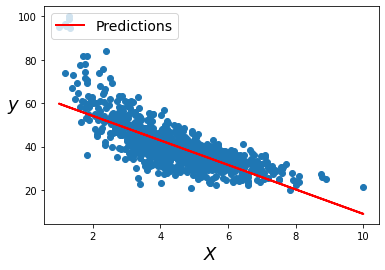

In [ ]:
# visualizacion del modelo

ypredls = ml.predict(xtrain)

plt.scatter(X, y)
plt.plot(xtrain, ypredls, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, ypredls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypredls)))
print('r2_score',r2_score(ytrain, ypredls))

Error medio Absoluto (MAE): 4.7988725965024415
Root Mean Squared Error: 6.780582381904548
r2_score 0.5794973298959796


In [ ]:
# obtenemos los datos de los modelos generados

modelos=('Regresion Lineal', 'Regresion Polinomial', 'Ridge', 'Lasso')

errormae=(metrics.mean_absolute_error(ytrain, ypred),
          metrics.mean_absolute_error(ytrain, ypredpoly),
          metrics.mean_absolute_error(ytrain, ypredrd),
          metrics.mean_absolute_error(ytrain, ypredls))

rcuadrada=(r2_score(ytrain, ypred),
          r2_score(ytrain, ypredpoly),
          r2_score(ytrain, ypredrd),
          r2_score(ytrain, ypredls))


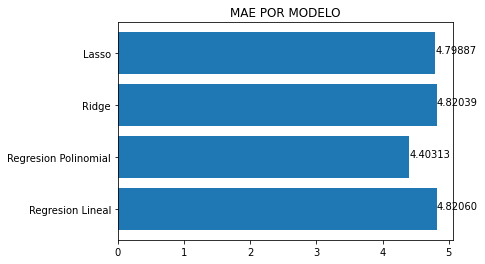

In [ ]:
# graficamos los errores MAE

plt.barh(modelos, errormae)
plt.title('MAE POR MODELO')
for index, value in enumerate(errormae):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

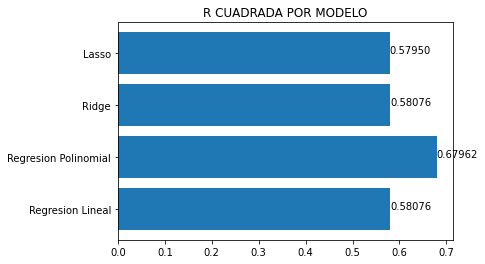

In [ ]:
# graficamos R cuadrada por modelo

plt.barh(modelos, rcuadrada)
plt.title('R CUADRADA POR MODELO')
for index, value in enumerate(rcuadrada):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

Explica tus resultados, que método conviene más a la empresa, ¿por que?
R= conviene mas el modelo de Regresión Polinomial porque es el que mejores resultados se obtiene en el ejercicio.

¿que porcentajes de entrenamiento y evaluación usaste?
R= Utilice el 80% para los datos de entrenamiento y el 20 para las pruebas

¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
R= El error que se obtiene en el modelo de regresión polinomial es del 4.40313 es el que mas cercano esta a 0 (cero), MAE es el promedio de los errores absolutos


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

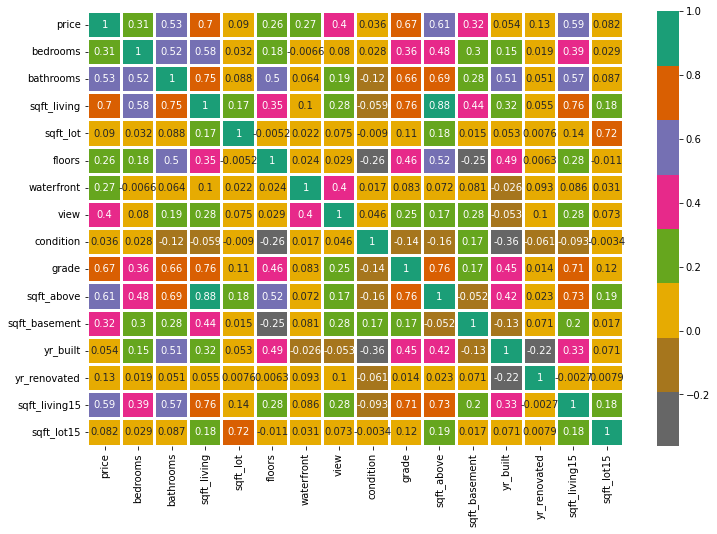

In [27]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [8]:
# escalamos los datos

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849


In [9]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [10]:
# Dividimos los datos utilizando la función train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [24]:
# Modelo de regresion lineal

lrh=LinearRegression()
lrh.fit(X_train, y_train)

LinearRegression()

In [25]:
# ecuacion del conjunto de entrenamiento

lrh.coef_, lrh.intercept_

(array([[-8.49373282e-02,  8.29572558e-02,  1.34076744e+13,
          3.19633535e-04,  4.71070593e-02,  1.30860436e-01,
          8.63454234e-02,  3.66019652e-02,  3.82672571e-01,
         -1.20887193e+13, -6.46084260e+12, -2.84053071e-01,
          1.25985923e-02,  5.29822807e-02, -3.90266766e-02]]),
 array([-0.00289236]))

In [26]:
# vista del modelo generado

y_predh = lrh.predict(X_train)
y_predh

array([[ 1.5899611 ],
       [ 2.03016508],
       [ 1.15105917],
       ...,
       [-0.50524208],
       [-0.23706149],
       [-0.54670679]])

In [33]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predh)))
print('r2_score',r2_score(y_train, y_predh))

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [14]:
# Realizamos el modelo de regresion polinomial

polyfh = PolynomialFeatures(degree=2, include_bias=True)
xpolyh = polyfh.fit_transform(X_train)

lrph = LinearRegression(fit_intercept=True)
lrph.fit(xpolyh, y_train)

LinearRegression()

In [15]:
# ecuacion del conjunto de entrenamiento

lrph.coef_, lrph.intercept_

(array([[-8.19338723e+05, -2.49535567e-02,  6.84385543e-02,
         -3.05877012e+09,  2.61143991e-03, -1.40550487e-02,
          1.22375504e+09,  3.89955322e-03,  6.50352202e-02,
          3.27879975e-01,  2.75786929e+09,  1.47394930e+09,
         -1.96270103e-01, -2.18721061e+00,  1.15670762e-01,
         -9.66837441e-02,  2.25423440e-03,  1.46253566e-02,
          1.32720665e+07, -1.95323323e-03,  1.17315286e-02,
         -2.51793864e-03, -6.05185223e-04, -8.64953220e-03,
         -1.59815466e-02, -1.19664516e+07, -6.39549636e+06,
         -3.47597871e-02, -9.29347929e-03,  3.00019422e-02,
          1.49210738e-02, -1.55562299e-02,  2.41842688e+06,
         -1.17792487e-02, -2.93447971e-02,  7.86972046e-03,
          6.15908206e-03, -1.47476792e-03,  5.49821854e-02,
         -2.18051857e+06, -1.16538295e+06,  3.10033560e-02,
         -1.43949538e-02, -2.48550773e-02, -3.20702791e-03,
          2.37795182e+08, -3.59240664e+07, -1.39505418e+08,
         -2.62620052e+08, -1.07346021e+0

In [16]:
# vista del modelo generado

y_predh_poly = lrph.predict(X_train)
y_predh_poly

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [12]:
# Generamos el modelo Ridge

modridgeh = Ridge(alpha=0.5)
mrh=modridgeh.fit(X_train,y_train)
mrh

Ridge(alpha=0.5)

In [13]:
# ecuacion del conjunto de entrenamiento

mrh.coef_, mrh.intercept_

(array([[-0.09676878,  0.08698499,  0.20267374,  0.00193268,  0.0466142 ,
          0.13024427,  0.08610428,  0.03761926,  0.38256703,  0.16860849,
          0.10511366, -0.28408559,  0.01451258,  0.05416246, -0.04076426]]),
 array([-0.00150917]))

In [17]:
# vista del modelo generado

y_predrdh = mrh.predict(X_train)
y_predrdh

array([[ 1.55965654],
       [ 2.00738499],
       [ 1.15457177],
       ...,
       [-0.50435395],
       [-0.22348753],
       [-0.54766388]])

In [18]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predrdh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predrdh)))
print('r2_score',r2_score(y_train, y_predrdh))

Error medio Absoluto (MAE): 0.3793559691718673
Root Mean Squared Error: 0.5835575266051601
r2_score 0.6529196649130556


In [19]:
# Generamos el modelo Lasso

modlassoh = Lasso(alpha=0.5)
mlh=modlassoh.fit(X_train,y_train)
mlh

Lasso(alpha=0.5)

In [20]:
# ecuacion del conjunto de entrenamiento

mlh.coef_, mlh.intercept_

(array([ 0.        ,  0.        ,  0.16725237,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.034192  ,  0.        ,
         0.        , -0.        ,  0.        ,  0.        ,  0.        ]),
 array([-0.00216943]))

In [21]:
# vista del modelo generado

y_predmlh = mlh.predict(X_train)
y_predmlh

array([ 0.37012962,  0.64329294,  0.2116949 , ..., -0.07589154,
       -0.19062014, -0.16507637])

In [22]:
# Error MAE, MSE, RMSE y R cuadrada

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_predmlh))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predmlh)))
print('r2_score',r2_score(y_train, y_predmlh))

Error medio Absoluto (MAE): 0.5397410628569553
Root Mean Squared Error: 0.8613794238900286
r2_score 0.24377392996144165


In [27]:
# obtenemos los datos de los modelos generados

modelos=('Regresion Lineal', 'Ridge', 'Lasso')

errormae=(metrics.mean_absolute_error(y_train, y_predh),
          #metrics.mean_absolute_error(y_train, y_predpoly),
          metrics.mean_absolute_error(y_train, y_predrdh),
          metrics.mean_absolute_error(y_train, y_predmlh))

rcuadrada=(r2_score(y_train, y_predh),
 #         r2_score(y_train, ypredpoly),
          r2_score(y_train, y_predrdh),
          r2_score(y_train, y_predmlh))


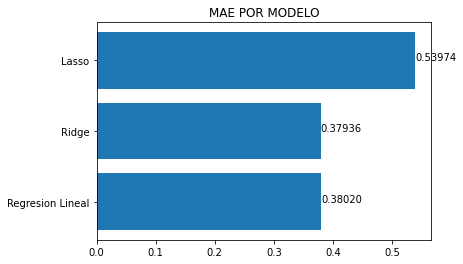

In [28]:
# graficamos los errores MAE

plt.barh(modelos, errormae)
plt.title('MAE POR MODELO')
for index, value in enumerate(errormae):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

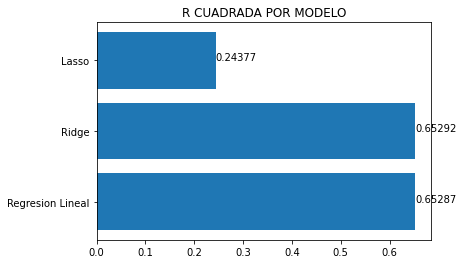

In [29]:
# graficamos R cuadrada por modelo

plt.barh(modelos, rcuadrada)
plt.title('R CUADRADA POR MODELO')
for index, value in enumerate(rcuadrada):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

Explica tus resultados, que método se aproxima mejor, ¿por qué?, 
R= En este segundo ejercicio conviene mas el modelo Ridge porque es el que mejores resultados genera

¿qué porcentajes de entrenamiento y evaluación usaste? 
R= Se utilizo el 90% para los datos de entrenamiento y el 10% para las pruebas

¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
R= El error que se obtiene en el modelo Ridge es del 0.37936 es el que mas cercano esta a 0 (cero), MAE es el promedio de los errores absolutos

Agrega las conclusiones
No logre obtener el resultado del modelo regresión polinomial por falta de tiempo considero que para obtener un buen modelo se requiere de un análisis más profundo.